In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt

%matplotlib inline

In [54]:
df_lodo = []
for csv in Path("./results/logo").glob("*/*.csv"):
    df = pd.read_csv(csv).rename(columns={"fold": "tgt"})
    if "__" in csv.stem:
        exp, tgt = csv.stem.split("__")
        df["exp"] = exp
        df["tgt"] = tgt
    else:
        df["exp"] = csv.stem
    df["features"] = csv.parts[-2]
    df_lodo.append(df)
df_lodo = pd.concat(df_lodo).set_index(["exp", "features", "tgt", "rep"]).sort_index()
df_lodo.head()

fit_time   
exp                          features                     tgt     rep             
cross_corpus_explicit_4class wav2vec2_audeering_ft_c_mean CREMA-D 0    4.364897  \
                                                          EmoV-DB 0    5.228010   
                             wav2vec_c_mean               CREMA-D 0    2.628199   
                                                          EmoV-DB 0    2.136759   
cross_corpus_induced_4class  wav2vec2_audeering_ft_c_mean IEMOCAP 0    5.389817   

                                                                       score_time   
exp                          features                     tgt     rep               
cross_corpus_explicit_4class wav2vec2_audeering_ft_c_mean CREMA-D 0      0.155334  \
                                                          EmoV-DB 0      0.114087   
                             wav2vec_c_mean               CREMA-D 0      0.107567   
                                                          EmoV-DB 0      0.098994   
cross_corpus_induced_4class  wav2vec2_audeering_ft_c_mean IEMOCAP 0      0.196389   

                                                                            uar   
exp                          features                     tgt     rep             
cross_corpus_explicit_4class wav2vec2_audeering_ft_c_mean CREMA-D 0    0.485965  \
                                                          EmoV-DB 0    0.573843   
                             wav2vec_c_mean               CREMA-D 0    0.389687   
                                                          EmoV-DB 0    0.573472   
cross_corpus_induced_4class  wav2vec2_audeering_ft_c_mean IEMOCAP 0    0.537125   

                                                                            war   
exp                          features                     tgt     rep             
cross_corpus_explicit_4class wav2vec2_audeering_ft_c_mean CREMA-D 0    0.466939  \
                                                          EmoV-DB 0    0.539637   
                             wav2vec_c_mean               CREMA-D 0    0.404286   
                                                          EmoV-DB 0    0.541763   
cross_corpus_induced_4class  wav2vec2_audeering_ft_c_mean IEMOCAP 0    0.541132   

                                                                        microf1   
exp                          features                     tgt     rep             
cross_corpus_explicit_4class wav2vec2_audeering_ft_c_mean CREMA-D 0    0.466939  \
                                                          EmoV-DB 0    0.539637   
                             wav2vec_c_mean               CREMA-D 0    0.404286   
                                                          EmoV-DB 0    0.541763   
cross_corpus_induced_4class  wav2vec2_audeering_ft_c_mean IEMOCAP 0    0.541132   

                                                                        macrof1   
exp                          features                     tgt     rep             
cross_corpus_explicit_4class wav2vec2_audeering_ft_c_mean CREMA-D 0    0.434857  \
                                                          EmoV-DB 0    0.550202   
                             wav2vec_c_mean               CREMA-D 0    0.331716   
                                                          EmoV-DB 0    0.520735   
cross_corpus_induced_4class  wav2vec2_audeering_ft_c_mean IEMOCAP 0    0.539510   

                                                                       anger_rec   
exp                          features                     tgt     rep              
cross_corpus_explicit_4class wav2vec2_audeering_ft_c_mean CREMA-D 0     0.572777  \
                                                          EmoV-DB 0     0.555205   
                             wav2vec_c_mean               CREMA-D 0     0.459481   
                                                          EmoV-DB 0     0.279180   
cross_corpus_induced_4class  wav2vec2_audeering_ft_c_mean IEM

In [8]:
df_pairwise = []
for csv in Path("./results/pairwise").glob("*/*/*.csv"):
    df = pd.read_csv(csv)
    src, tgt = csv.stem.split("__")
    df["src"] = src
    df["tgt"] = tgt
    df["exp"] = csv.parts[-2]
    df["features"] = csv.parts[-3]
    df_pairwise.append(df)
df_pairwise = pd.concat(df_pairwise).set_index(["exp", "features", "src", "tgt", "rep", "fold"]).sort_index()
df_pairwise.head()

fit_time   
exp                        features                     src tgt rep fold             
cross_lang_explicit_4class wav2vec2_audeering_ft_c_mean am  en  0   0     1.953581  \
                                                            es  0   0     2.820511   
                                                            fr  0   0     2.272998   
                                                            it  0   0     2.670808   
                                                            pt  0   0     1.325526   

                                                                          score_time   
exp                        features                     src tgt rep fold               
cross_lang_explicit_4class wav2vec2_audeering_ft_c_mean am  en  0   0       0.076018  \
                                                            es  0   0       0.007564   
                                                            fr  0   0       0.007890   
                                                            it  0   0       0.005500   
                                                            pt  0   0       0.003444   

                                                                               uar   
exp                        features                     src tgt rep fold             
cross_lang_explicit_4class wav2vec2_audeering_ft_c_mean am  en  0   0     0.456999  \
                                                            es  0   0     0.361979   
                                                            fr  0   0     0.668403   
                                                            it  0   0     0.449405   
                                                            pt  0   0     0.447056   

                                                                               war   
exp                        features                     src tgt rep fold             
cross_lang_explicit_4class wav2vec2_audeering_ft_c_mean am  en  0   0     0.445601  \
                                                            es  0   0     0.361979   
                                                            fr  0   0     0.646825   
                                                            it  0   0     0.449405   
                                                            pt  0   0     0.442982   

                                                                           microf1   
exp                        features                     src tgt rep fold             
cross_lang_explicit_4class wav2vec2_audeering_ft_c_mean am  en  0   0     0.445601  \
                                                            es  0   0     0.361979   
                                                            fr  0   0     0.646825   
                                                            it  0   0     0.449405   
                                                            pt  0   0     0.442982   

                                                                           macrof1   
exp                        features                     src tgt rep fold             
cross_lang_explicit_4class wav2vec2_audeering_ft_c_mean am  en  0   0     0.360773  \
                                                            es  0   0     0.306597   
                                                            fr  0   0     0.628221   
                                                            it  0   0     0.353784   
                                                            pt  0   0     0.347537   

                                                                          anger_rec   
exp                        features                     src tgt rep fold              
cross_lang_explicit_4class wav2vec2_audeering_ft_c_mean am  en  0   0      0.887490  \
                                                            es  0   0      0.625000   
                                                            fr  0   0      0.972222   
       

In [9]:
df_within = []
for csv in Path("./results/within").glob("*/*/*.csv"):
    df = pd.read_csv(csv)
    src = csv.stem
    df["src"] = src
    df["tgt"] = src
    df["exp"] = csv.parts[-2]
    df["features"] = csv.parts[-3]
    df_within.append(df)
df_within = pd.concat(df_within).set_index(["exp", "features", "src", "tgt", "rep", "fold"]).sort_index()
df_within.head()

fit_time   
exp                          features                     src     tgt     rep fold             
cross_corpus_explicit_4class wav2vec2_audeering_ft_c_mean CREMA-D CREMA-D 0   0     4.123414  \
                                                                              1     3.832255   
                                                                              2     3.658355   
                                                                              3     2.727438   
                                                                              4     1.888426   

                                                                                    score_time   
exp                          features                     src     tgt     rep fold               
cross_corpus_explicit_4class wav2vec2_audeering_ft_c_mean CREMA-D CREMA-D 0   0       0.032868  \
                                                                              1       0.031130   
                                                                              2       0.029369   
                                                                              3       0.028973   
                                                                              4       0.015300   

                                                                                         uar   
exp                          features                     src     tgt     rep fold             
cross_corpus_explicit_4class wav2vec2_audeering_ft_c_mean CREMA-D CREMA-D 0   0     0.859788  \
                                                                              1     0.816799   
                                                                              2     0.884921   
                                                                              3     0.862765   
                                                                              4     0.874008   

                                                                                         war   
exp                          features                     src     tgt     rep fold             
cross_corpus_explicit_4class wav2vec2_audeering_ft_c_mean CREMA-D CREMA-D 0   0     0.858025  \
                                                                              1     0.812757   
                                                                              2     0.884774   
                                                                              3     0.860082   
                                                                              4     0.872428   

                                                                                     microf1   
exp                          features                     src     tgt     rep fold             
cross_corpus_explicit_4class wav2vec2_audeering_ft_c_mean CREMA-D CREMA-D 0   0     0.858025  \
                                                                              1     0.812757   
                                                                              2     0.884774   
                                                                              3     0.860082   
                                                                              4     0.872428   

                                                                                     macrof1   
exp                          features                     src     tgt     rep fold             
cross_corpus_explicit_4class wav2vec2_audeering_ft_c_mean CREMA-D CREMA-D 0   0     0.857388  \
                                                                              1     0.813940   
                                                                              2     0.885784   
                                                                              3     0.862195   
                                                                              4     0.874141   

                                

In [50]:
def mad(x: pd.Series):
    return (x - x.median(skipna=False)).abs().median(skipna=False)

def median_mad(x: pd.Series):
    return f"{x.median(skipna=False):.1f} ({mad(x):.1f})"

EXP_ORDER = [
    "venec_cross_country_18class",
    "esd_cross_lang_test",
    "emofilm_cross_lang_5class",
    "eng_cross_country_explicit_4class",
    "cross_lang_induced_4class",
    "cross_lang_explicit_4class_2",
    "cross_corpus_induced_4class",
    "cross_corpus_explicit_4class",
    "cross_corpus_natural_6class",
    "cross_naturalness_4class",
]
FEATURES = "wav2vec2_audeering_ft_c_mean"

## UAR and relative UAR

In [58]:
within_uar = (
    df_within.xs(FEATURES, level="features")
    .groupby(["exp", "tgt"])["uar"]
    .mean()
    .mul(100)
)
lodo_uar = (
    df_lodo.xs(FEATURES, level="features")
    .groupby(["exp", "tgt"])["uar"]
    .mean()
    .mul(100)
)
pairwise_uar = (
    df_pairwise.xs(FEATURES, level="features")
    .groupby(["exp", "tgt"])["uar"]
    .mean()
    .mul(100)
)

print("UAR")
print(
    pd.concat(
        [within_uar, lodo_uar, pairwise_uar], axis=1, keys=["WD", "LODO", "Pairwise"]
    )
    .groupby("exp")
    .agg(median_mad)
    .reindex(EXP_ORDER)
    .to_string()
)
print()

print("Relative UAR (LODO)")
print(
    within_uar.sub(lodo_uar)
    .groupby("exp")
    .agg(median_mad)
    .reindex(EXP_ORDER)
    .to_string()
)
print()

print("Relative UAR (pairwise)")
print(
    within_uar.sub(pairwise_uar)
    .groupby("exp")
    .agg(median_mad)
    .reindex(EXP_ORDER)
    .to_string()
)

UAR
                                            WD        LODO    Pairwise
exp                                                                   
venec_cross_country_18class         28.2 (3.2)  20.6 (2.9)  17.2 (1.5)
esd_cross_lang_test                 90.4 (2.6)  56.0 (2.1)   nan (nan)
emofilm_cross_lang_5class           65.0 (2.2)  69.9 (2.9)  61.9 (1.2)
eng_cross_country_explicit_4class   85.1 (2.2)  62.7 (2.0)  58.1 (2.3)
cross_lang_induced_4class          71.3 (14.5)  52.8 (5.3)  43.0 (2.1)
cross_lang_explicit_4class_2        87.5 (6.0)  61.2 (6.2)  55.3 (4.3)
cross_corpus_induced_4class         63.8 (2.4)  51.8 (2.0)   nan (nan)
cross_corpus_explicit_4class        90.8 (6.7)  53.0 (4.4)   nan (nan)
cross_corpus_natural_6class         35.4 (5.1)  27.4 (3.3)   nan (nan)
cross_naturalness_4class            61.0 (0.4)  52.9 (6.6)   nan (nan)

Relative UAR (LODO)
exp
venec_cross_country_18class           4.7 (2.8)
esd_cross_lang_test                  34.4 (4.7)
emofilm_cross_lang_5cla

## Emotion classes

In [69]:
df_within.index.unique("exp")

binary_exps = [
    "cross_corpus_explicit_4class",
    "cross_corpus_induced_4class",
    "cross_corpus_natural_6class",
    "cross_naturalness_4class",
    "esd_cross_lang_test",
]
multi_exps = [
    "cross_lang_explicit_4class_2",
    "cross_lang_induced_4class",
    "emofilm_cross_lang_5class",
    "eng_cross_country_explicit_4class",
    "venec_cross_country_18class",
]

EMO_ORDER = ["anger", "disgust", "fear", "happiness", "neutral", "sadness", "surprise"]

df = (
    pd.concat([df_lodo.loc[binary_exps], df_pairwise.loc[multi_exps]])
    .xs(FEATURES, level="features")
    .mul(100)
)
print(
    df[[x for x in df.columns if x.endswith("_f1")]]
    .groupby("exp")
    .median()
    .rename(columns=lambda x: x.replace("_f1", ""))
    .reindex(index=EXP_ORDER, columns=EMO_ORDER)
    .to_string(float_format="{:.1f}".format)
)

                                   anger  disgust  fear  happiness  neutral  sadness  surprise
exp                                                                                           
venec_cross_country_18class         29.6      7.6  20.7       17.8      NaN     13.9       NaN
esd_cross_lang_test                 50.1      NaN   NaN       48.5     42.7     72.0      54.1
emofilm_cross_lang_5class           86.3     55.7  47.8       54.8      NaN     72.9       NaN
eng_cross_country_explicit_4class   61.3      NaN   NaN       54.4     48.4     62.2       NaN
cross_lang_induced_4class           28.6      NaN   NaN       28.3     38.5     30.6       NaN
cross_lang_explicit_4class_2        65.9      NaN   NaN       53.5     49.8     55.7       NaN
cross_corpus_induced_4class         53.4      NaN   NaN       58.0     55.7     42.1       NaN
cross_corpus_explicit_4class        65.3     34.7   NaN       47.1     49.9      NaN       NaN
cross_corpus_natural_6class         19.9     14.3 

## Tables

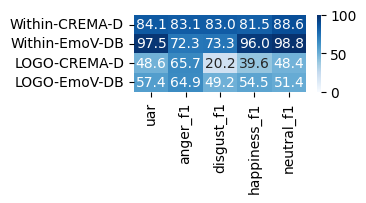

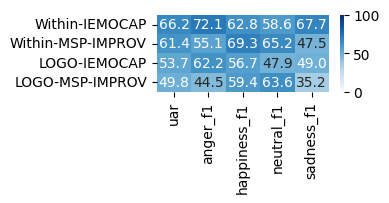

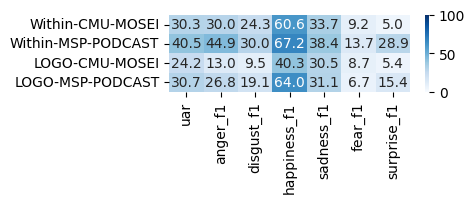

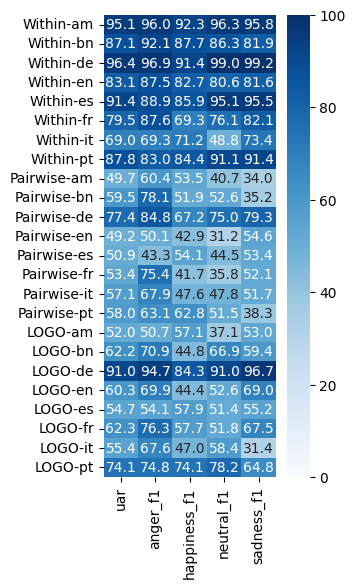

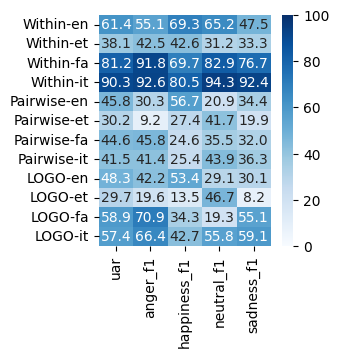

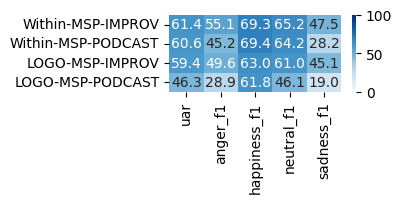

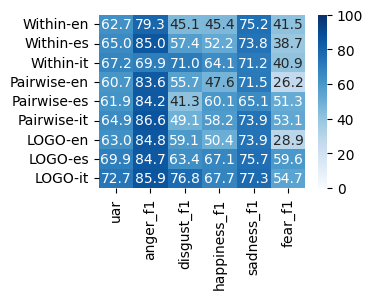

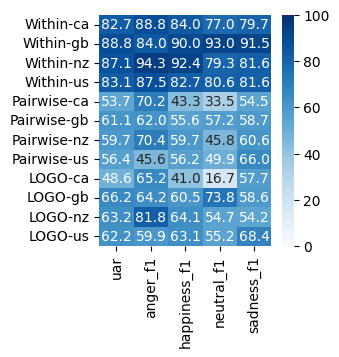

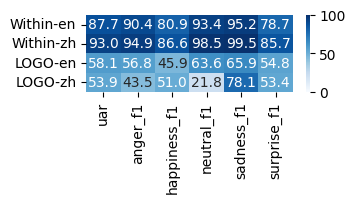

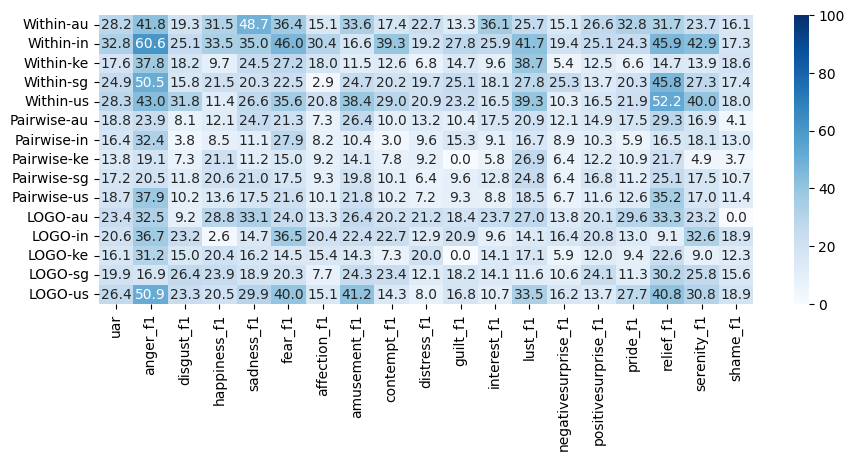

In [59]:
for exp in df_lodo.index.unique("exp"):
    sub_df = df_lodo.loc[exp, "wav2vec2_audeering_ft_c_mean"].dropna(axis=1)
    classes = ["uar"] + [x for x in sub_df.columns if x.endswith("_f1")]
    mean_within = df_within.loc[exp, "wav2vec2_audeering_ft_c_mean"].groupby("tgt")[classes].mean()
    mean_logo = sub_df.groupby("tgt")[classes].mean()

    if exp in df_pairwise.index.unique("exp"):
        mean_pair = df_pairwise.loc[exp, "wav2vec2_audeering_ft_c_mean"].groupby("tgt")[classes].mean()
        df = pd.concat([mean_within, mean_pair, mean_logo], keys=["Within", "Pairwise", "LOGO"])
    else:
        df = pd.concat([mean_within, mean_logo], keys=["Within", "LOGO"])

    fig, ax = plt.subplots(figsize=(len(classes) / 1.8, len(df) / 4))
    sns.heatmap(df * 100, cmap="Blues", vmin=0, annot=True, fmt=".1f", vmax=100, ax=ax)
    ax.set(ylabel=None)
    plt.show()
